In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from functools import reduce

In [140]:
# Set as Y variable
state_deliquency3089 = pd.read_csv('data/StateMortgagesPercent-30-89DaysLate-thru-2023-12.csv')
state_deliquency0090 = pd.read_csv('data/StateMortgagesPercent-90-plusDaysLate-thru-2023-12.csv')
national_deliquency3089 = pd.read_csv('data/Loan Performance Total Loans and Leases 30-89 Day Past Due Rate.csv')

In [141]:
display(state_deliquency3089.head())
display(state_deliquency0090.head())
display(national_deliquency3089.head())

,RegionType,Name,FIPSCode,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,National,United States,-----,3.5,3.2,3.1,3.1,3.2,3.2,3.4,...,1.3,1.2,1.4,1.2,1.5,1.6,1.4,1.5,1.5,1.8
1,State,Alabama,'01',4.3,4.0,3.9,3.9,4.0,3.9,4.2,...,1.9,1.7,2.1,1.8,2.4,2.3,2.0,2.3,2.3,2.7
2,State,Alaska,'02',2.7,2.2,2.3,2.2,2.0,2.2,2.1,...,1.3,1.1,1.1,1.0,1.2,1.3,1.1,1.3,1.2,1.6
3,State,Arizona,'04',3.5,3.3,3.2,3.2,3.4,3.4,3.6,...,1.0,1.0,1.1,1.0,1.2,1.2,1.2,1.3,1.3,1.5
4,State,Arkansas,'05',4.0,3.5,3.1,3.1,3.4,3.5,3.4,...,1.6,1.7,1.7,1.7,2.1,2.2,1.9,2.1,2.1,2.4


,RegionType,Name,FIPSCode,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,National,United States,-----,1.5,1.6,1.6,1.5,1.6,1.7,1.8,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.6,0.6
1,State,Alabama,'01',1.4,1.4,1.4,1.4,1.4,1.5,1.6,...,0.5,0.5,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.8
2,State,Alaska,'02',0.6,0.8,0.8,0.7,0.9,1.0,1.1,...,0.4,0.4,0.4,0.5,0.4,0.5,0.6,0.5,0.5,0.6
3,State,Arizona,'04',1.5,1.7,1.7,1.8,1.8,1.9,2.1,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.5
4,State,Arkansas,'05',1.4,1.4,1.3,1.3,1.2,1.3,1.3,...,0.7,0.7,0.7,0.7,0.7,0.7,0.8,0.7,0.8,0.9


,DATE,QBPLNTLN3089DUR
0,1984-01-01,1.268784
1,1984-04-01,1.104983
2,1984-07-01,1.108781
3,1984-10-01,1.330088
4,1985-01-01,1.267834


In [142]:
# SELECT STATE florida
state_deliquency3089_florida = state_deliquency3089[state_deliquency3089['Name'] == 'Florida']
state_deliquency0090_florida = state_deliquency0090[state_deliquency0090['Name'] == 'Florida']

# new data frame df
df = pd.DataFrame()

# set it to the values of the deliquency columns for 30-89 days and 90+ days for florida 
df['FL_30-89 days'] = state_deliquency3089_florida.iloc[0, 1:].values
df['FL_90+ days'] = state_deliquency0090_florida.iloc[0, 1:].values
# drop the first and second row of the data frame and reset the index
df.drop(df.index[0], inplace=True)
df.drop(df.index[0], inplace=True)
df.reset_index(drop=True, inplace=True)

# add date column to the data frame from 2008-01 to 2023-12 by month set the format to month end
date = pd.date_range(start='2008-01', end='2023-12', freq='ME').strftime('%Y-%m')
df = pd.concat([df, pd.DataFrame(date, columns=['Date'])], axis=1)

# set the date as the first column
# ADD NATIONAL DATA TO THE DATA FRAME SET 
# Convert 'DATE' column to datetime, then format as 'YYYY-MM' to match the format in df
national_deliquency3089['DATE'] = pd.to_datetime(national_deliquency3089['DATE'])
national_deliquency3089['Date'] = national_deliquency3089['DATE'].dt.strftime('%Y-%m')

# Merge the national deliquency data with df on 'Date' column   
df = pd.merge(national_deliquency3089[['Date', 'QBPLNTLN3089DUR']], df, on='Date', how='outer')
df = df.rename(columns={'QBPLNTLN3089DUR': 'National_30-89 days'})
df = df[['Date', 'FL_30-89 days', 'FL_90+ days', 'National_30-89 days']]

# change the last row to 2023-12
df.iloc[-1, 0] = '2023-12'
# sort the data frame by date
df = df.sort_values(by='Date')
display(df.tail())


,Date,FL_30-89 days,FL_90+ days,National_30-89 days
284,2023-09,1.4,0.6,NaN
285,2023-10,1.4,0.6,0.605993
286,2023-11,1.4,0.6,NaN
288,2023-12,1.7,0.7,NaN
287,2024-01,NaN,NaN,0.570303


In [143]:
# convert the data frame to csv file
# df.to_csv('data/deliquency_data.csv', index=False)

In [144]:
# set X variable
# X1 = pd.read_csv('data/events-FL-1980-2024.csv', skiprows=2)
# display(X1.tail())

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths
85,Central Tornado Outbreak and Eastern Severe We...,Severe Storm,20240401,20240403,2465.5,2441.0,3
86,Southern and Eastern Severe Weather (April 2024),Severe Storm,20240408,20240411,2725.1,2698.0,0
87,"Central, Southern, Southeastern Tornado Outbre...",Severe Storm,20240506,20240509,6234.0,6234.0,3
88,Southern Severe Weather (May 2024),Severe Storm,20240511,20240513,1124.0,1124.0,1
89,Southern Derecho (May 2024),Severe Storm,20240516,20240517,1335.0,1335.0,8


In [145]:
# Convert Begin Date to datetime to extract the year
X1['Begin Date'] = pd.to_datetime(X1['Begin Date'], format='%Y%m%d')

In [146]:
# Group by Year and Disaster type, then count occurrences
X1 = X1[['Begin Date', 'Disaster']]
X1.rename(columns={'Begin Date': 'Date'}, inplace=True)

In [147]:
# Display the first 10 rows
X1.head(10)

,Date,Disaster
0,1981-01-12,Freeze
1,1982-01-08,Winter Storm
2,1982-12-01,Flooding
3,1983-12-15,Freeze
4,1984-03-27,Severe Storm
5,1985-01-19,Winter Storm
6,1985-01-20,Freeze
7,1985-08-30,Tropical Cyclone
8,1985-10-27,Tropical Cyclone
9,1989-12-23,Freeze


In [148]:
# merge df and X1 on Date and Total_Disaster_Number
X1['Date'] = pd.to_datetime(X1['Date'])
df['Date'] = pd.to_datetime(df['Date'])

df = pd.merge(X1, df, on='Date', how='outer')

# df.drop(columns='Year', inplace=True)

# Display the first 10 rows
df.head(10)


,Date,Disaster,FL_30-89 days,FL_90+ days,National_30-89 days
0,1981-01-12,Freeze,NaN,NaN,NaN
1,1982-01-08,Winter Storm,NaN,NaN,NaN
2,1982-12-01,Flooding,NaN,NaN,NaN
3,1983-12-15,Freeze,NaN,NaN,NaN
4,1984-01-01,NaN,NaN,NaN,1.268784
5,1984-03-27,Severe Storm,NaN,NaN,NaN
6,1984-04-01,NaN,NaN,NaN,1.104983
7,1984-07-01,NaN,NaN,NaN,1.108781
8,1984-10-01,NaN,NaN,NaN,1.330088
9,1985-01-01,NaN,NaN,NaN,1.267834


In [149]:
# convert the data frame to csv file
# df.to_csv('data/disaster_deliquency_data.csv', index=False)

In [2]:
def adjust_dates(year, month, day):
    """ Adjust invalid days in February for non-leap years. """
    if month == 2 and day == 29:
        if not ((year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)):
            return 28 
    return day

In [3]:
def climate_data_reader(climate_path):
    climate_data = pd.DataFrame()
    for file in os.listdir(climate_path):
        if file.endswith('.csv'):
            file_path = os.path.join(climate_path, file)
            try:
                tp_df = pd.read_csv(file_path)
                tp_df.columns = tp_df.columns.str.strip()
                
                # convert MEAN TEMP to float and replace -99.9 with NaN
                
                tp_df['MEAN TEMP'] = pd.to_numeric(tp_df['MEAN TEMP'], errors='coerce')                
                tp_df['MEAN TEMP'] = tp_df['MEAN TEMP'].replace(-99.9, np.nan)
                # Adjust DAY values before conversion
                tp_df['DAY'] = tp_df.apply(lambda x: adjust_dates(x['YEAR'], x['MONTH'], x['DAY']), axis=1)

                # Now safe to convert to datetime
                tp_df['Date'] = pd.to_datetime(tp_df[['YEAR', 'MONTH', 'DAY']], errors='coerce')
                            
                # Identify rows where Date conversion failed
                if tp_df['Date'].isna().any():
                    print(f"Date conversion issues found in {file}. Example rows where issue occurred:")
                    print(tp_df[tp_df['Date'].isna()][['YEAR', 'MONTH', 'DAY']].head())

                station_name = file.split('_')[0]
                mean_temp_column_name = f'MEAN TEMP {station_name}'
                
                # Rename 'MEAN TEMP' column to include the station name
                if 'MEAN TEMP' in tp_df.columns:
                    tp_df.rename(columns={'MEAN TEMP': mean_temp_column_name}, inplace=True)

                # Merge with the main DataFrame
                if climate_data.empty:
                    climate_data = tp_df[['Date', mean_temp_column_name]]
                else:
                    climate_data = pd.concat([climate_data, tp_df[['Date', mean_temp_column_name]]])
                    
            except Exception as e:
                print(f'Error reading {file_path}: {e}')
                
    return climate_data

In [5]:
# create a list to store the data frames
data_list = [None] * 9

# Read climate data 
for i in range(9):
    climate_path = f'data/FL_CLIMATE'
    data_list[i] = climate_data_reader(climate_path)
    print(len(data_list[i]))
    

2926412
2926412
2926412
2926412
2926412
2926412
2926412
2926412
2926412


In [6]:
#convet all the data frames in the list date to datetime
for i in range(9):
    data_list[i]['Date'] = pd.to_datetime(data_list[i]['Date'])

In [7]:
for i in range(9):
    display(data_list[i].head())

,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,MEAN TEMP APALACHICOLA,MEAN TEMP ARCADIA,MEAN TEMP ARCHBOLD,MEAN TEMP AVON,MEAN TEMP BARDENTON,MEAN TEMP BARTOW,MEAN TEMP BELLE GLADE,MEAN TEMP BROOKSVILLE,MEAN TEMP BUSHNELL,...,MEAN TEMP TAMPA,MEAN TEMP TARPON,MEAN TEMP TITUSVILLE,MEAN TEMP USHER,MEAN TEMP VENICE,MEAN TEMP VERO,MEAN TEMP WAUCHULA,MEAN TEMP WEEKI,MEAN TEMP WEST,MEAN TEMP WEWAHITCHKA
0,1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# calculate the mean temperature for each data frame in the list (col1 to col9) and add it to the data frame name it as 'Mean_Temperature i' and drop the original columns only keep the date and the Mean_Temperature i columns

combine_data = pd.DataFrame()

for i in range(9):
    # Create a copy of the DataFrame slice to avoid SettingWithCopyWarning
    current_df = data_list[i].copy()
    
    # Convert all possible columns to numeric, ignoring errors to skip non-convertible ones
    numeric_df = current_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    
    # Calculate the mean and assign it back to the original DataFrame
    current_df[f'Mean_Temperature_{i}'] = numeric_df.mean(axis=1, skipna=True)
    
    # Select only the relevant columns to avoid any further SettingWithCopyWarning
    current_df = current_df[['Date', f'Mean_Temperature_{i}']]
    
    # Drop rows where the mean temperature couldn't be calculated (if any)
    current_df.dropna(subset=[f'Mean_Temperature_{i}'], inplace=True)
    
    # Replace the old DataFrame in the list with the updated DataFrame
    data_list[i] = current_df
    
    if combine_data.empty:
        combine_data = data_list[0]
    else:
        combine_data = pd.concat([data_list[i], combine_data])
    
    # Display the head of each DataFrame to verify
    display(data_list[i].head())


,Date,Mean_Temperature_0
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


,Date,Mean_Temperature_1
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


,Date,Mean_Temperature_2
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


,Date,Mean_Temperature_3
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


,Date,Mean_Temperature_4
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


,Date,Mean_Temperature_5
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


,Date,Mean_Temperature_6
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


,Date,Mean_Temperature_7
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


,Date,Mean_Temperature_8
60,1931-03-01,65.0
61,1931-03-02,55.0
62,1931-03-03,50.0
63,1931-03-04,46.0
64,1931-03-05,48.5


In [16]:
# resorted the data frame by date
combine_data = combine_data.sort_values(by='Date')
display(combine_data.head(20))

,Date,Mean_Temperature
0,2008-01-01,62.833333
1,2008-01-02,54.111111
2,2008-01-03,40.222222
3,2008-01-04,47.722222
4,2008-01-05,54.555556
5,2008-01-06,60.055556
6,2008-01-07,62.666667
7,2008-01-08,67.722222
8,2008-01-09,66.611111
9,2008-01-10,67.111111


In [10]:
combine_data['Date'] = pd.to_datetime(combine_data['Date'])
combine_data = combine_data.groupby('Date').agg('first').reset_index()

In [11]:
# calculate the mean temperature from col1 to col9 and add it to the data frame
combine_data['Mean_Temperature'] = combine_data.iloc[:, 1:].mean(axis=1)
combine_data = combine_data[['Date', 'Mean_Temperature']]
# reset the index
combine_data.reset_index(drop=True, inplace=True)

display(combine_data.head())

,Date,Mean_Temperature
0,1892-01-01,66.111111
1,1892-01-02,61.055556
2,1892-01-03,46.722222
3,1892-01-04,47.444444
4,1892-01-05,56.222222


In [12]:
len(combine_data)

48212

In [13]:
# convert the data frame to csv file   
combine_data.to_csv('data/fl_climate_data.csv', index=False)

In [14]:
# select date from 2008-01 to 2023-12 
combine_data = combine_data[(combine_data['Date'] >= '2008-01') & (combine_data['Date'] <= '2023-12')]
# reset the index
combine_data.reset_index(drop=True, inplace=True)
display(combine_data.head())

# convert the data frame to csv file
combine_data.to_csv('data/fl_climate_data2008-2023.csv', index=False)


,Date,Mean_Temperature
0,2008-01-01,62.833333
1,2008-01-02,54.111111
2,2008-01-03,40.222222
3,2008-01-04,47.722222
4,2008-01-05,54.555556


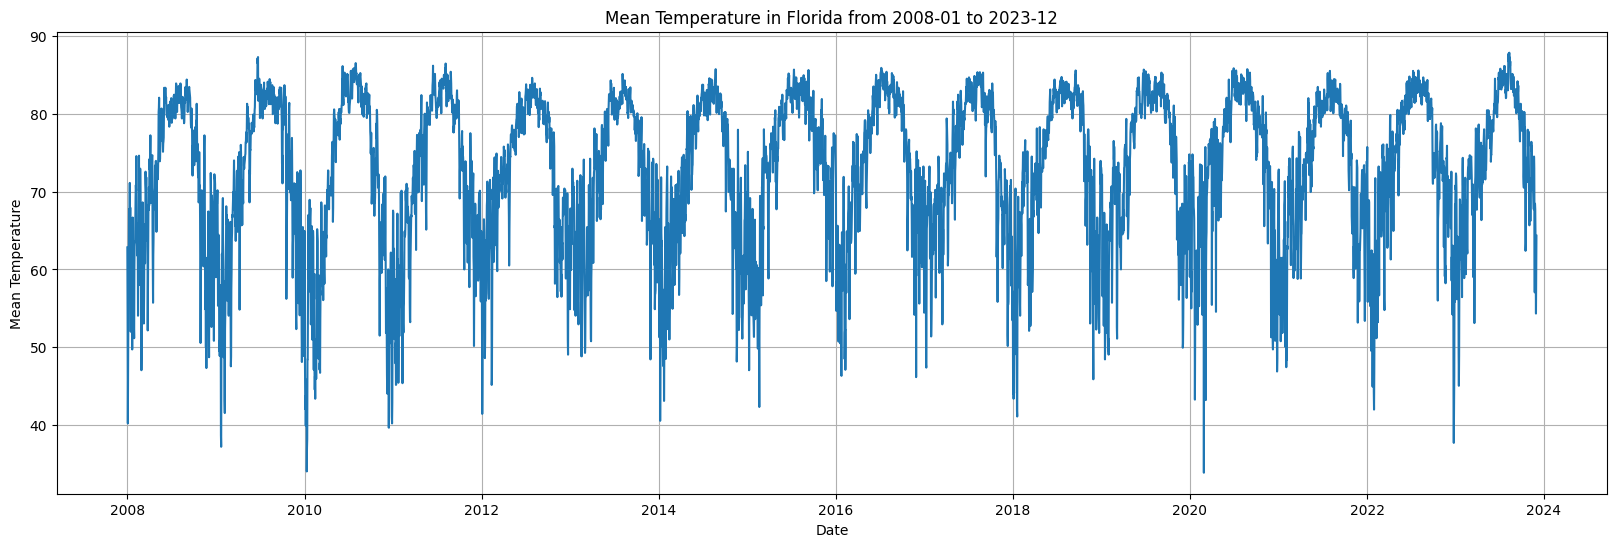

In [15]:
# plot the mean temperature from 2008-01 to 2023-12
plt.figure(figsize=(20, 6))
plt.plot(combine_data['Date'], combine_data['Mean_Temperature'])
plt.title('Mean Temperature in Florida from 2008-01 to 2023-12')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid()
plt.show()


In [115]:
# set Macroeconomic data
fl_unemployment_data = pd.read_csv('data/Macroeconomic/Unemployment Rate/FL_Unemployment Rate1976-2024.csv')
us_unemployment_data = pd.read_csv('data/Macroeconomic/Unemployment Rate/US_Unemployment Rate_1948-2024.csv')

In [116]:
len(fl_unemployment_data), len(us_unemployment_data)

(583, 920)

In [117]:
fl_unemployment_data['DATE'] = pd.to_datetime(fl_unemployment_data['DATE'])
us_unemployment_data['DATE'] = pd.to_datetime(us_unemployment_data['DATE'])


merged_data = pd.merge(fl_unemployment_data, us_unemployment_data, on='DATE', how='inner')

# Rename columns for clarity
merged_data.rename(columns={'FLUR': 'FL_Unemployment_Rate', 'UNRATE': 'US_Unemployment_Rate'}, inplace=True)

# set date to daily frequency and fill the missing values with the first month value

# Display the first few rows of the merged data
display(merged_data.head())
display(merged_data.tail())

len(merged_data)

,DATE,FL_Unemployment_Rate,US_Unemployment_Rate
0,1976-01-01,9.7,7.9
1,1976-02-01,9.7,7.7
2,1976-03-01,9.6,7.6
3,1976-04-01,9.5,7.7
4,1976-05-01,9.3,7.4


,DATE,FL_Unemployment_Rate,US_Unemployment_Rate
578,2024-03-01,3.2,3.8
579,2024-04-01,3.3,3.9
580,2024-05-01,3.3,4.0
581,2024-06-01,3.3,4.1
582,2024-07-01,3.3,4.3


583

In [118]:
# merge df and merged_data on Date
mortgage_avg_data = pd.read_csv('data/Macroeconomic/Interest Rate/30-Year Fixed Rate Mortgage Average in the United States.csv')
fed_funds_rate_data = pd.read_csv('data/Macroeconomic/Interest Rate/Federal Funds Effective Rate.csv')

In [119]:
len(mortgage_avg_data), len(fed_funds_rate_data)

(2791, 843)

In [120]:
fed_funds_rate_data['DATE'] = pd.to_datetime(fed_funds_rate_data['DATE'])
fed_funds_rate_data.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [121]:
fed_funds_rate_data.tail()

,DATE,FEDFUNDS
838,2024-05-01,5.33
839,2024-06-01,5.33
840,2024-07-01,5.33
841,2024-08-01,5.33
842,2024-09-01,5.13


In [122]:
#calculate the mean of the mortgage rate by the month
mortgage_avg_data['DATE'] = pd.to_datetime(mortgage_avg_data['DATE'])
mortgage_avg_data['DATE'] = mortgage_avg_data['DATE'].dt.to_period('M')
mortgage_avg_data = mortgage_avg_data.groupby('DATE').agg('mean').reset_index()

# Display the first few rows of the mortgage data
display(mortgage_avg_data.head())

,DATE,MORTGAGE30US
0,1971-04,7.3100
1,1971-05,7.4250
2,1971-06,7.5300
3,1971-07,7.6040
4,1971-08,7.6975


In [123]:
# change the date column to datetime and set the date to first day of the month
mortgage_avg_data['DATE'] = pd.to_datetime(mortgage_avg_data['DATE'].astype(str) + '-01')
mortgage_avg_data.head()

,DATE,MORTGAGE30US
0,1971-04-01,7.3100
1,1971-05-01,7.4250
2,1971-06-01,7.5300
3,1971-07-01,7.6040
4,1971-08-01,7.6975


In [94]:
len(mortgage_avg_data)

642

In [125]:
# List of dataframes to merge
combined_data = pd.merge(mortgage_avg_data, fed_funds_rate_data, on='DATE', how='inner')

In [126]:
display(combined_data.head())

len(combined_data)

,DATE,MORTGAGE30US,FEDFUNDS
0,1971-04-01,7.3100,4.16
1,1971-05-01,7.4250,4.63
2,1971-06-01,7.5300,4.91
3,1971-07-01,7.6040,5.31
4,1971-08-01,7.6975,5.57


642

In [127]:
combined_data['DATE'] = pd.to_datetime(combined_data['DATE'])
combined_data = pd.merge(merged_data, combined_data, on='DATE', how='inner')

In [128]:
combined_data.head()

,DATE,FL_Unemployment_Rate,US_Unemployment_Rate,MORTGAGE30US,FEDFUNDS
0,1976-01-01,9.7,7.9,9.0160,4.87
1,1976-02-01,9.7,7.7,8.8125,4.77
2,1976-03-01,9.6,7.6,8.7550,4.84
3,1976-04-01,9.5,7.7,8.7300,4.82
4,1976-05-01,9.3,7.4,8.7650,5.29


In [129]:
combined_data = combined_data.rename(columns={'DATE': 'Date', 'MORTGAGE30US':'US 30-Year Mortgage Rate', 'FEDFUNDS':'Federal Funds Rate'})
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.tail()

,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,Federal Funds Rate
578,2024-03-01,3.2,3.8,6.8200,5.33
579,2024-04-01,3.3,3.9,6.9925,5.33
580,2024-05-01,3.3,4.0,7.0600,5.33
581,2024-06-01,3.3,4.1,6.9175,5.33
582,2024-07-01,3.3,4.3,6.8475,5.33


In [130]:
combined_data.head()

,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,Federal Funds Rate
0,1976-01-01,9.7,7.9,9.0160,4.87
1,1976-02-01,9.7,7.7,8.8125,4.77
2,1976-03-01,9.6,7.6,8.7550,4.84
3,1976-04-01,9.5,7.7,8.7300,4.82
4,1976-05-01,9.3,7.4,8.7650,5.29


In [131]:
# filter the data from 2008-01 to 2023-12
combined_data = combined_data[(combined_data['Date'] >= '2008-01') & (combined_data['Date'] <= '2023-12')]
combined_data.reset_index(drop=True, inplace=True)
combined_data.head()


,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,Federal Funds Rate
0,2008-01-01,4.2,5.0,5.7580,3.94
1,2008-02-01,4.4,4.9,5.9175,2.98
2,2008-03-01,4.6,5.1,5.9700,2.61
3,2008-04-01,4.9,5.0,5.9175,2.28
4,2008-05-01,5.2,5.4,6.0360,1.98


In [132]:
len(combined_data)

192

In [82]:
# Reading the CSV file
inflation_us_data = pd.read_csv('data/Macroeconomic/Inflation/Inflation consumer prices for the United States.csv')
inflation_us_data.rename(columns={'DATE': 'Date', 'FPCPITOTLZGUSA': 'US Consumer Price Inflation Rate'}, inplace=True)

# Merging the inflation data with the existing combined data using outer join
inflation_us_data['Date'] = pd.to_datetime(inflation_us_data['Date'])

combined_data_updated = pd.merge(combined_data, inflation_us_data, on='Date', how='outer')

# Display the first few rows of the updated combined dataframe
combined_data_updated.tail()


,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,Federal Funds Rate,US Consumer Price Inflation Rate
594,1971-01-01,NaN,NaN,NaN,NaN,4.292767
595,1972-01-01,NaN,NaN,NaN,NaN,3.272278
596,1973-01-01,NaN,NaN,NaN,NaN,6.177760
597,1974-01-01,NaN,NaN,NaN,NaN,11.054805
598,1975-01-01,NaN,NaN,NaN,NaN,9.143147


In [83]:
combined_data_updated.head()

,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,Federal Funds Rate,US Consumer Price Inflation Rate
0,1976-01-01,9.7,7.9,9.0160,4.87,5.744813
1,1976-02-01,9.7,7.7,8.8125,4.77,NaN
2,1976-03-01,9.6,7.6,8.7550,4.84,NaN
3,1976-04-01,9.5,7.7,8.7300,4.82,NaN
4,1976-05-01,9.3,7.4,8.7650,5.29,NaN


In [84]:
len(combined_data_updated)

599

In [133]:
fl_mo_df = pd.read_excel('data/Macroeconomic/bbgData/FL_home_mage30yrs.xlsx', skiprows=5)
fl_mo_df.tail() 

,Date,PX_LAST,CHG_NET_1D
6536,1999-05-28,7.13,0.02
6537,1999-05-27,7.11,0.01
6538,1999-05-26,7.10,0.00
6539,1999-05-24,7.10,-0.01
6540,1999-05-21,7.11,NaN


In [134]:
# drop the CHG_NET_1D column
fl_mo_df.drop(columns='CHG_NET_1D', inplace=True)

#calculate the mean of the mortgage rate by the month
fl_mo_df['Date'] = pd.to_datetime(fl_mo_df['Date'])
fl_mo_df['Date'] = fl_mo_df['Date'].dt.to_period('M')
fl_mo_df = fl_mo_df.groupby('Date').agg('mean').reset_index()

# Display the first few rows of the mortgage data
display(fl_mo_df.head())


,Date,PX_LAST
0,1999-05,7.113333
1,1999-06,7.400455
2,1999-07,7.443529
3,1999-08,7.757000
4,1999-09,7.615500


In [135]:
# change the date column to datetime and set the date to first day of the month
fl_mo_df['Date'] = pd.to_datetime(fl_mo_df['Date'].astype(str) + '-01')

#change the name of the column
fl_mo_df.rename(columns={'PX_LAST': 'FL 30-Year Mortgage Rate'}, inplace=True)
len(fl_mo_df)

305

In [136]:
display(fl_mo_df.head())

,Date,FL 30-Year Mortgage Rate
0,1999-05-01,7.113333
1,1999-06-01,7.400455
2,1999-07-01,7.443529
3,1999-08-01,7.757000
4,1999-09-01,7.615500


In [137]:
# merge the fl_mo_df with the combined_data_updated on Date
combined_data_updated = pd.merge(combined_data, fl_mo_df, on='Date', how='inner')

# Display the first few rows of the updated combined dataframe
display(combined_data_updated.head())

len(combined_data_updated)

,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,Federal Funds Rate,FL 30-Year Mortgage Rate
0,2008-01-01,4.2,5.0,5.7580,3.94,5.467727
1,2008-02-01,4.4,4.9,5.9175,2.98,5.710476
2,2008-03-01,4.6,5.1,5.9700,2.61,5.773500
3,2008-04-01,4.9,5.0,5.9175,2.28,5.701364
4,2008-05-01,5.2,5.4,6.0360,1.98,5.717727


192

In [138]:
# reorder the columns
combined_data_updated = combined_data_updated[['Date', 'FL_Unemployment_Rate', 'US_Unemployment_Rate', 'US 30-Year Mortgage Rate', 'FL 30-Year Mortgage Rate', 'Federal Funds Rate']]

combined_data_updated.head()

,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,FL 30-Year Mortgage Rate,Federal Funds Rate
0,2008-01-01,4.2,5.0,5.7580,5.467727,3.94
1,2008-02-01,4.4,4.9,5.9175,5.710476,2.98
2,2008-03-01,4.6,5.1,5.9700,5.773500,2.61
3,2008-04-01,4.9,5.0,5.9175,5.701364,2.28
4,2008-05-01,5.2,5.4,6.0360,5.717727,1.98


In [139]:
# convert the data frame to csv file
combined_data_updated.to_csv('data/fl_macro_data_withnogdp.csv', index=False)


In [207]:
newdf = pd.DataFrame()
for file in os.listdir('data/Macroeconomic/GDP'):
    if file.endswith('.csv'):
        # Reading the CSV file
        gdp_data = pd.read_csv(f'data/Macroeconomic/GDP/{file}')
        gdp_data.rename(columns={'DATE': 'Date'}, inplace=True)
        gdp_data['Date'] = pd.to_datetime(gdp_data['Date'])

        # Merging the GDP data with the existing combined data using outer join
        if newdf.empty:
            newdf = gdp_data
        else:
            newdf = pd.merge(newdf, gdp_data, on='Date', how='outer')


newdf.head()

,Date,GDP,A939RX0Q048SBEA,GDPC1
0,1947-01-01,243.164,15248.0,2182.681
1,1947-04-01,245.968,15139.0,2176.892
2,1947-07-01,249.585,15039.0,2172.432
3,1947-10-01,259.745,15204.0,2206.452
4,1948-01-01,265.742,15371.0,2239.682


In [208]:
# rename columns for clarity 
newdf.rename(columns={'GDP': 'US_GDP', 'GDPC1': 'US_Real_GDP', 'A939RX0Q048SBEA':'US_Real_GDP_Per_Capita'}, inplace=True)
# Display the first few rows of the updated combined dataframe

newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf.tail()

,Date,US_GDP,US_Real_GDP_Per_Capita,US_Real_GDP
305,2023-04-01,27063.012,66357.0,22225.350
306,2023-07-01,27610.128,67050.0,22490.692
307,2023-10-01,27956.998,67513.0,22679.255
308,2024-01-01,28269.174,67672.0,22758.752
309,2024-04-01,28652.337,68088.0,22924.863


In [209]:
len(newdf)

310

In [205]:
us_hs_df = pd.read_excel('data/us_household_debt_2disposable_income.xlsx', skiprows=5)
us_hs_df.drop(columns='CHG_NET_1D', inplace=True)
us_hs_df.rename(columns={'PX_LAST': 'US_Household_Debt_to_Disposable_Income'}, inplace=True)

#change to Date column to datetime and set the date to first day of the month
us_hs_df['Date'] = pd.to_datetime(us_hs_df['Date'])
us_hs_df['Date'] = us_hs_df['Date'].dt.to_period('M')
# shift next month
us_hs_df['Date'] = us_hs_df['Date']

# set the date to the last day of the month
us_hs_df['Date'] = pd.to_datetime(us_hs_df['Date'].astype(str) + '-01') + pd.offsets.MonthEnd(1)
 
us_hs_df.head()


,Date,US_Household_Debt_to_Disposable_Income
0,2024-03-31,97.07
1,2023-12-31,97.51
2,2023-09-30,97.61
3,2023-06-30,97.60
4,2023-03-31,98.23


In [210]:
#shift the newdf date one day back 
newdf['Date'] = newdf['Date'] - pd.DateOffset(1)

In [211]:
# merge the us_hs_df with the newdf on Date
newdf = pd.merge(newdf, us_hs_df, on='Date', how='inner')

# Display the first few rows of the updated combined dataframe
newdf.head()


,Date,US_GDP,US_Real_GDP_Per_Capita,US_Real_GDP,US_Household_Debt_to_Disposable_Income
0,1990-03-31,5960.028,40382.0,10083.855,82.21
1,1990-06-30,6015.116,40266.0,10090.569,82.31
2,1990-09-30,6004.733,39759.0,9998.704,82.46
3,1990-12-31,6035.178,39451.0,9951.916,83.24
4,1991-03-31,6126.862,39632.0,10029.510,83.81


In [212]:
len(newdf)

137

In [158]:
# convert the data frame to csv file
newdf.to_csv('data/fl_macro_gdp_data.csv', index=False)

In [159]:
# filter the data from 2008-01 to 2023-12
newdf = newdf[(newdf['Date'] >= '2008-01') & (newdf['Date'] <= '2023-12')]
newdf.reset_index(drop=True, inplace=True)

# convert the data frame to csv file
newdf.to_csv('data/fl_macro_gdp_data2008-2023.csv', index=False)

In [160]:
newdf.head()


,Date,US_GDP,US_Real_GDP_Per_Capita,US_Real_GDP,US_Household_Debt_to_Disposable_Income
0,2008-01-01,14706.538,55497.0,16843.003,134.80
1,2008-04-01,14865.701,55705.0,16943.291,134.59
2,2008-07-01,14898.999,55278.0,16854.295,130.20
3,2008-10-01,14608.209,53941.0,16485.350,132.16
4,2009-01-01,14430.902,53221.0,16298.262,130.13


In [191]:
# read the data frame
us_tr_df = pd.read_excel('data/Macroeconomic/bbgData/marketMatrixussell5yrsbuy30yr.xlsx', skiprows=5)
us_uf_df = pd.read_excel('data/Macroeconomic/bbgData/us_inflation.xlsx', skiprows=5)

display(us_tr_df.head())
display(us_uf_df.head())

,Date,PX_LAST,CHG_NET_1D
0,2024-09-25,61.277,-0.145
1,2024-09-24,61.422,2.924
2,2024-09-23,58.499,0.296
3,2024-09-20,58.203,1.578
4,2024-09-19,56.625,3.177


,Date,PX_LAST
0,2024-09-25,2.3878
1,2024-09-24,2.3900
2,2024-09-23,2.3772
3,2024-09-20,2.3600
4,2024-09-19,2.3790


In [192]:
# change the name of the column
us_tr_df.rename(columns={'PX_LAST': 'US 5 Year Treasury Price'}, inplace=True)
us_uf_df.rename(columns={'PX_LAST': 'US Inflation Rate'}, inplace=True)

#display the first few rows of the data frame
display(us_tr_df.head())
display(us_uf_df.head())


,Date,US 5 Year Treasury Price,CHG_NET_1D
0,2024-09-25,61.277,-0.145
1,2024-09-24,61.422,2.924
2,2024-09-23,58.499,0.296
3,2024-09-20,58.203,1.578
4,2024-09-19,56.625,3.177


,Date,US Inflation Rate
0,2024-09-25,2.3878
1,2024-09-24,2.3900
2,2024-09-23,2.3772
3,2024-09-20,2.3600
4,2024-09-19,2.3790


In [193]:
# calculate the mean of the US 5 Year Treasury Price by the month
us_tr_df = us_tr_df.drop(columns='CHG_NET_1D')

us_tr_df['Date'] = pd.to_datetime(us_tr_df['Date'])
us_tr_df['Date'] = us_tr_df['Date'].dt.to_period('M')
us_tr_df = us_tr_df.groupby('Date').agg('mean').reset_index()

us_tr_df.head()

,Date,US 5 Year Treasury Price
0,1992-09,197.100000
1,1992-10,194.795455
2,1992-11,157.104762
3,1992-12,136.400000
4,1993-01,152.300000


In [194]:
# change the date column to datetime and set the date to first day of the month
us_tr_df['Date'] = pd.to_datetime(us_tr_df['Date'].astype(str) + '-01')
us_tr_df.head()

,Date,US 5 Year Treasury Price
0,1992-09-01,197.100000
1,1992-10-01,194.795455
2,1992-11-01,157.104762
3,1992-12-01,136.400000
4,1993-01-01,152.300000


In [195]:
# calculate the mean of the US Inflation Rate by the month

us_uf_df['Date'] = pd.to_datetime(us_uf_df['Date'])
us_uf_df['Date'] = us_uf_df['Date'].dt.to_period('M')
us_uf_df = us_uf_df.groupby('Date').agg('mean').reset_index()

us_uf_df.head()


,Date,US Inflation Rate
0,2004-07,2.898750
1,2004-08,2.851190
2,2004-09,2.756136
3,2004-10,2.714524
4,2004-11,2.873864


In [196]:
# change the date column to datetime and set the date to first day of the month 
us_uf_df['Date'] = pd.to_datetime(us_uf_df['Date'].astype(str) + '-01')

us_uf_df.head()

,Date,US Inflation Rate
0,2004-07-01,2.898750
1,2004-08-01,2.851190
2,2004-09-01,2.756136
3,2004-10-01,2.714524
4,2004-11-01,2.873864


In [197]:
# temp data frame to store the data
temp_df = pd.DataFrame()

#merge the us_tr_df and us_uf_df on Date
temp_df = pd.merge(us_tr_df, us_uf_df, on='Date', how='inner')

# Display the first few rows of the updated combined dataframe
temp_df.head()




,Date,US 5 Year Treasury Price,US Inflation Rate
0,2004-07-01,154.187091,2.898750
1,2004-08-01,159.412500,2.851190
2,2004-09-01,155.921500,2.756136
3,2004-10-01,151.450048,2.714524
4,2004-11-01,137.107571,2.873864


In [198]:
combined_data_updated.head()

,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,FL 30-Year Mortgage Rate,Federal Funds Rate
0,2008-01-01,4.2,5.0,5.7580,5.467727,3.94
1,2008-02-01,4.4,4.9,5.9175,5.710476,2.98
2,2008-03-01,4.6,5.1,5.9700,5.773500,2.61
3,2008-04-01,4.9,5.0,5.9175,5.701364,2.28
4,2008-05-01,5.2,5.4,6.0360,5.717727,1.98


In [199]:
# merge the temp_df with the combined_data_updated on Date
combined_data_updated = pd.merge(combined_data_updated, temp_df, on='Date', how='inner')

# Display the first few rows of the updated combined dataframe
combined_data_updated.head()


,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,FL 30-Year Mortgage Rate,Federal Funds Rate,US 5 Year Treasury Price,US Inflation Rate
0,2008-01-01,4.2,5.0,5.7580,5.467727,3.94,136.740857,2.667326
1,2008-02-01,4.4,4.9,5.9175,5.710476,2.98,174.357600,2.775681
2,2008-03-01,4.6,5.1,5.9700,5.773500,2.61,191.844250,2.913076
3,2008-04-01,4.9,5.0,5.9175,5.701364,2.28,160.924727,2.760223
4,2008-05-01,5.2,5.4,6.0360,5.717727,1.98,145.097000,2.865364


In [200]:
len(combined_data_updated)

192

In [201]:
#convert the data frame to csv file
combined_data_updated.to_csv('data/fl_macro_gdp_data_with_inflation.csv', index=False)

In [162]:
# Path to the directory containing the Excel files
directory = 'data/Macroeconomic/bbgData'

# Initialize an empty DataFrame or load an initial DataFrame if you have one
combined_data_updated_1 = pd.DataFrame()

# Loop through each file in the directory
i= 0
for file in os.listdir(directory):
    if file.endswith('.xlsx'):  # Check if the file is an Excel file
        file_path = os.path.join(directory, file)  # Get the full path of the file
        try:
            # Read the Excel file
            real_estate_data = pd.read_excel(file_path, skiprows=5)
            
            real_estate_data = real_estate_data.rename(columns={'DATE': 'Date', 'PX_LAST': f'RATE{i}'})
            # drop the columns 'CHG_NET_1D' if it exists
            if 'CHG_NET_1D' in real_estate_data.columns:
                real_estate_data.drop(columns=['CHG_NET_1D'], inplace=True)
            
            i+=1
            # Print column names to check the correct name for the date column
            print(f"Column names in {file}: {real_estate_data.columns.tolist()}")

            # Check and rename the 'Date' column if necessary
            if 'Date' in real_estate_data.columns:
                date_column = 'Date'
            elif 'DATE' in real_estate_data.columns:
                date_column = 'DATE'
                real_estate_data.rename(columns={'DATE': 'Date'}, inplace=True)
            else:
                raise ValueError("No valid Date column found")

            # Convert 'Date' to datetime format
            real_estate_data['Date'] = pd.to_datetime(real_estate_data['Date'])

            # Merge the current file's data with the combined data
            if combined_data_updated_1.empty:
                combined_data_updated_1 = real_estate_data
            else:
                combined_data_updated_1 = pd.merge(combined_data_updated_1, real_estate_data, on='Date', how='outer')
        except Exception as e:
            print(f"Failed to process {file}: {e}")

# Check the combined data
combined_data_updated_1.rename(columns={'RATE0': 'US 5 Year Treasury Price', 'RATE1': 'US Inflation Rate'}, inplace=True)
display(combined_data_updated_1.tail())


Column names in marketMatrixussell5yrsbuy30yr.xlsx: ['Date', 'RATE0']
Column names in us_inflation.xlsx: ['Date', 'RATE1']


,Date,US 5 Year Treasury Price,US Inflation Rate
8336,2005-11-24,NaN,2.75
8337,2005-11-11,NaN,2.85
8338,2005-02-21,NaN,2.87
8339,2004-12-24,NaN,2.89
8340,2004-11-25,NaN,2.92


In [399]:
# combine combined_data_updated and combined_data_updated_1 on Date
df = pd.merge(combined_data_updated, combined_data_updated_1, on='Date', how='outer')
df['Date'] = pd.to_datetime(df['Date'])

display(df.tail())

,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,Federal Funds Rate,US 30-Year Jumbo Mortgage Rate,US Consumer Price Inflation Rate,US_GDP,US_Real_GDP_Per_Capita,US_Real_GDP,FL 30-Year Mortgage Rate,US 5 Year Treasury Price,Household Debt to Income,US Inflation Rate
10638,2024-09-19,NaN,NaN,6.09,4.83,6.542,NaN,NaN,NaN,NaN,6.56,56.625,NaN,2.3790
10639,2024-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.58,58.203,NaN,2.3600
10640,2024-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.63,58.499,NaN,2.3772
10641,2024-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.422,NaN,2.3900
10642,2024-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.277,NaN,2.3878


In [400]:
# select the time from 2008-01 to 2023-12
df_select = df[(df['Date'] >= '2008-01') & (df['Date'] <= '2023-12')]
df_select.reset_index(drop=True, inplace=True)
display(df_select.head())

,Date,FL_Unemployment_Rate,US_Unemployment_Rate,US 30-Year Mortgage Rate,Federal Funds Rate,US 30-Year Jumbo Mortgage Rate,US Consumer Price Inflation Rate,US_GDP,US_Real_GDP_Per_Capita,US_Real_GDP,FL 30-Year Mortgage Rate,US 5 Year Treasury Price,Household Debt to Income,US Inflation Rate
0,2008-01-01,4.2,5.0,NaN,NaN,NaN,3.8391,14706.538,55497.0,16843.003,5.76,NaN,NaN,2.7490
1,2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.68,107.027,NaN,2.7400
2,2008-01-03,NaN,NaN,6.07,NaN,NaN,NaN,NaN,NaN,NaN,5.63,111.070,NaN,2.7445
3,2008-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.55,119.022,NaN,2.7040
4,2008-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.53,118.539,NaN,2.7175


In [401]:
# combine df_select to csv file
df_select.to_csv('data/2008-2023macroeconomicData.csv', index=False)

In [402]:
#convert the df to csv
df.to_csv('data/macroeconomicData.csv', index=False)

In [35]:
# get florida data

df_fl = pd.read_csv('data\original_data\csvState\FL.csv', low_memory=False)

In [38]:
display(df_fl.head())

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
0,739,199903,N,201402,NaN,0,1,P,35,18,...,1,Other sellers,CHASE MANHATTAN MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9
1,706,199905,N,202904,33124.0,30,1,P,95,43,...,2,FLEET MORTGAGE CORPORATION,Other servicers,NaN,NaN,9,NaN,9,N,9
2,546,199905,N,202904,33124.0,12,1,P,85,34,...,1,GMAC MORTGAGE CORPORATION,GMAC MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9
3,642,199903,N,202902,38940.0,0,1,P,50,34,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
4,643,199903,N,201402,NaN,0,1,P,69,41,...,2,"NATIONSBANK, N.A.","BANK OF AMERICA, N.A.",NaN,NaN,9,NaN,9,N,9


In [74]:
df_fl_cy = df_fl.copy()

In [75]:
#convert 'CREDIT SCORE	' to numeric and drop the rows 'CREDIT SCORE' is 9999
df_fl_cy['CREDIT SCORE'] = pd.to_numeric(df_fl_cy['CREDIT SCORE'], errors='coerce')

# drop the rows 'CREDIT SCORE' is 9999 and filter the FIRST PAYMENT DATE from 2007-09 to 2023-12
df_fl_cy = df_fl_cy[df_fl_cy['CREDIT SCORE'] != 9999]    

display(df_fl_cy.head())

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
0,739,199903,N,201402,NaN,0,1,P,35,18,...,1,Other sellers,CHASE MANHATTAN MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9
1,706,199905,N,202904,33124.0,30,1,P,95,43,...,2,FLEET MORTGAGE CORPORATION,Other servicers,NaN,NaN,9,NaN,9,N,9
2,546,199905,N,202904,33124.0,12,1,P,85,34,...,1,GMAC MORTGAGE CORPORATION,GMAC MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9
3,642,199903,N,202902,38940.0,0,1,P,50,34,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
4,643,199903,N,201402,NaN,0,1,P,69,41,...,2,"NATIONSBANK, N.A.","BANK OF AMERICA, N.A.",NaN,NaN,9,NaN,9,N,9


In [77]:
# convert 'FIRST PAYMENT DATE' and 'MATURITY DATE' to datetime and filter the date from 2007-09 to 2023-12
df_fl_cy.loc[:, 'FIRST PAYMENT DATE'] = df_fl_cy['FIRST PAYMENT DATE'].astype(str)
df_fl_cy.loc[:, 'MATURITY DATE'] = df_fl_cy['MATURITY DATE'].astype(str)

# Now convert and format the dates using .loc for further modification
df_fl_cy['FIRST PAYMENT DATE'] = pd.to_datetime(df_fl_cy['FIRST PAYMENT DATE'], format='%Y%m')
df_fl_cy['MATURITY DATE'] = pd.to_datetime(df_fl_cy['MATURITY DATE'], format='%Y%m')

In [78]:
display(df_fl_cy.head())

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
0,739,1999-03-01,N,2014-02-01,NaN,0,1,P,35,18,...,1,Other sellers,CHASE MANHATTAN MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9
1,706,1999-05-01,N,2029-04-01,33124.0,30,1,P,95,43,...,2,FLEET MORTGAGE CORPORATION,Other servicers,NaN,NaN,9,NaN,9,N,9
2,546,1999-05-01,N,2029-04-01,33124.0,12,1,P,85,34,...,1,GMAC MORTGAGE CORPORATION,GMAC MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9
3,642,1999-03-01,N,2029-02-01,38940.0,0,1,P,50,34,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
4,643,1999-03-01,N,2014-02-01,NaN,0,1,P,69,41,...,2,"NATIONSBANK, N.A.","BANK OF AMERICA, N.A.",NaN,NaN,9,NaN,9,N,9


In [79]:
len(df_fl_cy), len(df_fl)

(2756653, 2762800)

In [69]:
#convert the df_fl to csv file
df_fl_cy.to_csv('data/florida_single_lvt_data.csv', index=False)

In [80]:
#filter the date from 2007-09 to 2023-12
# Define the date range for filtering
start_date = pd.Timestamp('2007-09-01')
end_date = pd.Timestamp('2023-12-31')

# Filter the DataFrame to include only the rows within the date range
filtered_df = df_fl_cy[(df_fl_cy['FIRST PAYMENT DATE'] >= start_date) & (df_fl_cy['FIRST PAYMENT DATE'] <= end_date)]

display(filtered_df.head())

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
19751,714,2013-03-01,N,2043-02-01,27260.0,25,1,P,90,28,...,1,"NORWEST MORTGAGE, INC.",Other servicers,NaN,NaN,9,NaN,9,N,9
81450,668,2008-04-01,N,2030-03-01,NaN,0,1,I,77,33,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
217896,765,2013-04-01,N,2016-09-01,NaN,0,1,I,80,49,...,1,"BANK OF AMERICA, N.A.","BANK OF AMERICA, N.A.",NaN,NaN,9,NaN,9,N,9
266629,747,2009-01-01,N,2031-12-01,NaN,0,1,P,47,44,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
375525,695,2010-06-01,N,2016-05-01,NaN,25,1,I,90,999,...,2,"WELLS FARGO HOME MORTGAGE, INC.","WELLS FARGO BANK, N.A.",NaN,NaN,9,NaN,9,N,9


In [82]:
# sort the data frame by 'FIRST PAYMENT DATE' and reset the index
filtered_df = filtered_df.sort_values(by='FIRST PAYMENT DATE')
filtered_df.reset_index(drop=True, inplace=True)

display(filtered_df.head())

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
0,733,2007-09-01,N,2037-08-01,35840.0,0,1,P,90,45,...,2,"COUNTRYWIDE HOME LOANS, INC.",Other servicers,NaN,NaN,9,NaN,9,N,9
1,675,2007-09-01,Y,2037-08-01,22744.0,30,1,P,95,51,...,2,"BANK OF AMERICA, N.A.","BANK OF AMERICA, N.A.",NaN,NaN,9,NaN,9,N,9
2,540,2007-09-01,N,2037-08-01,37340.0,0,1,P,56,49,...,2,"SUNTRUST MORTGAGE, INC.",Other servicers,NaN,NaN,9,NaN,9,N,9
3,602,2007-09-01,N,2037-08-01,45300.0,0,1,P,70,32,...,1,"SUNTRUST MORTGAGE, INC.",Other servicers,NaN,NaN,9,NaN,9,N,9
4,688,2007-09-01,N,2037-08-01,45300.0,0,1,P,80,41,...,2,"SUNTRUST MORTGAGE, INC.","SUNTRUST MORTGAGE, INC.",NaN,NaN,9,NaN,9,N,9


In [104]:
# convert the data frame to csv file
filtered_df.to_csv('data/florida_single_lvt_data_filtered.csv', index=False)

In [83]:
len(filtered_df)

1744372

In [18]:
hurdat2_data_path = 'data/FL_HURRICANE/hurdat2-1851-2023-051124.txt'
hurdat2_df = pd.read_csv(hurdat2_data_path, header=None, skiprows=1)

# Every 20 lines starts a new cyclone event block with metadata. Let's process accordingly.
rows_per_cyclone = 20  # This is an assumption based on the example; may need to adjust after initial load

# Initialize an empty list to hold the data
parsed_data = []

# Open the file and read line by line
with open(data_path, 'r') as file:
    cyclone_block = []  # Temporarily store cyclone block data
    for line in file:
        if line.strip():  # Ignore empty lines
            parts = line.strip().split(",")
            if len(parts) == 4:  # Header line
                if cyclone_block:  # If there is a previous cyclone block, process it
                    parsed_data.extend(cyclone_block)  # Add the previous cyclone block to the main list
                    cyclone_block = []  # Reset the cyclone block
                # Add cyclone header info to each data row in the block
                cyclone_id, cyclone_name, num_records = parts[0], parts[1], int(parts[2])
                cyclone_block.append([cyclone_id.strip(), cyclone_name.strip(), num_records])  # Initialize new block
            else:  # Data lines
                cyclone_block.append(parts)  # Add data line to current cyclone block

# Add the last cyclone block to the list if it exists
if cyclone_block:
    parsed_data.extend(cyclone_block)

# Convert the list of lists into a DataFrame
# Here we are just trying to get a basic DataFrame up, we will refine the column naming and structure in the next step
hurdat2_df_raw = pd.DataFrame(parsed_data)

# Display the first few rows of the raw DataFrame to understand its structure
hurdat2_df_raw.head()  # Show more rows to understand the structure better

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,AL011851,UNNAMED,14,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,18510625,0000,,HU,28.0N,94.8W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,18510625,0600,,HU,28.0N,95.4W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,18510625,1200,,HU,28.0N,96.0W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,18510625,1800,,HU,28.1N,96.5W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [19]:
# Separating and integrating cyclone metadata with the cyclone track data

# First, let's identify the header rows which contain the cyclone metadata
headers_mask = hurdat2_df_raw[3].isna()
headers = hurdat2_df_raw[headers_mask].reset_index(drop=True)
data_rows = hurdat2_df_raw[~headers_mask].reset_index(drop=True)

# Append metadata from headers to the data rows
expanded_data = []
for index, header in headers.iterrows():
    cyclone_id = header[0]
    cyclone_name = header[1]
    num_records = int(header[2])
    
    # Slice the data rows corresponding to this cyclone
    cyclone_data = data_rows.iloc[:num_records]
    data_rows = data_rows.iloc[num_records:]  # Remove processed rows
    
    # Add cyclone ID and name to each row of the cyclone data
    cyclone_data.insert(0, 'Cyclone ID', cyclone_id)
    cyclone_data.insert(1, 'Cyclone Name', cyclone_name)
    
    # Collect the data
    expanded_data.append(cyclone_data)

# Concatenate all processed data into a new DataFrame
processed_hurdat2_df = pd.concat(expanded_data, ignore_index=True)

# Assign column names to the DataFrame
column_names_full = [
    "Cyclone ID", "Cyclone Name", "Date", "Time", "Record Identifier", "Status",
    "Latitude", "Longitude", "Max Sustained Wind (knots)", "Min Pressure (mbar)",
    "34 kt NE", "34 kt SE", "34 kt SW", "34 kt NW",
    "50 kt NE", "50 kt SE", "50 kt SW", "50 kt NW",
    "64 kt NE", "64 kt SE", "64 kt SW", "64 kt NW",
    "Extra Column 1", "Extra Column 2"
]

# Since there are 24 columns identified, apply these names to the DataFrame
processed_hurdat2_df.columns = column_names_full[:len(processed_hurdat2_df.columns)]

# Display the first few rows of the correctly labeled DataFrame to ensure the structure is as expected
processed_hurdat2_df.head()


,Cyclone ID,Cyclone Name,Date,Time,Record Identifier,Status,Latitude,Longitude,Max Sustained Wind (knots),Min Pressure (mbar),...,34 kt NW,50 kt NE,50 kt SE,50 kt SW,50 kt NW,64 kt NE,64 kt SE,64 kt SW,64 kt NW,Extra Column 1
0,AL011851,UNNAMED,18510625,0000,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,0600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [20]:
# based on the latitude and longitude, we figure out the Florida state
florida_lat = (24.396308, 31.001056)
florida_lon = (-87.634938, -79.974304)

# remove the N and W from the latitude and longitude
processed_hurdat2_df['Latitude'] = processed_hurdat2_df['Latitude'].str.rstrip('N')
processed_hurdat2_df['Longitude'] = processed_hurdat2_df['Longitude'].str.rstrip('W')


In [21]:
processed_hurdat2_df.head()

,Cyclone ID,Cyclone Name,Date,Time,Record Identifier,Status,Latitude,Longitude,Max Sustained Wind (knots),Min Pressure (mbar),...,34 kt NW,50 kt NE,50 kt SE,50 kt SW,50 kt NW,64 kt NE,64 kt SE,64 kt SW,64 kt NW,Extra Column 1
0,AL011851,UNNAMED,18510625,0000,,HU,28.0,94.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,0600,,HU,28.0,95.4,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0,96.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1,96.5,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2,96.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [22]:
len(processed_hurdat2_df)

54749

In [23]:
# convert the latitude and longitude to float and filter the data to include only the cyclones that have passed through Florida
processed_hurdat2_df['Latitude'] = pd.to_numeric(processed_hurdat2_df['Latitude'], errors='coerce')
processed_hurdat2_df['Longitude'] = pd.to_numeric(processed_hurdat2_df['Longitude'], errors='coerce')
display(processed_hurdat2_df.head())

,Cyclone ID,Cyclone Name,Date,Time,Record Identifier,Status,Latitude,Longitude,Max Sustained Wind (knots),Min Pressure (mbar),...,34 kt NW,50 kt NE,50 kt SE,50 kt SW,50 kt NW,64 kt NE,64 kt SE,64 kt SW,64 kt NW,Extra Column 1
0,AL011851,UNNAMED,18510625,0000,,HU,28.0,94.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,0600,,HU,28.0,95.4,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0,96.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1,96.5,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2,96.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [24]:
florida_cyclones = processed_hurdat2_df[
    (processed_hurdat2_df['Latitude'] >= florida_lat[0]) & (processed_hurdat2_df['Latitude'] <= florida_lat[1]) &
    (processed_hurdat2_df['Longitude']*-1 >= florida_lon[0]) & (processed_hurdat2_df['Longitude']*-1 <= florida_lon[1])
]

# Display the first few rows of the filtered DataFrame
florida_cyclones.head()

,Cyclone ID,Cyclone Name,Date,Time,Record Identifier,Status,Latitude,Longitude,Max Sustained Wind (knots),Min Pressure (mbar),...,34 kt NW,50 kt NE,50 kt SE,50 kt SW,50 kt NW,64 kt NE,64 kt SE,64 kt SW,64 kt NW,Extra Column 1
39,AL041851,UNNAMED,18510821,1800,,HU,24.4,84.3,70,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
40,AL041851,UNNAMED,18510822,0000,,HU,25.0,84.9,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
41,AL041851,UNNAMED,18510822,0600,,HU,25.6,85.5,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
42,AL041851,UNNAMED,18510822,1200,,HU,26.2,86.0,90,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
43,AL041851,UNNAMED,18510822,1800,,HU,26.8,86.3,90,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [25]:
len(florida_cyclones)

2506

In [26]:
wind_radii_columns = [
    "34 kt NE", "34 kt SE", "34 kt SW", "34 kt NW",
    "50 kt NE", "50 kt SE", "50 kt SW", "50 kt NW",
    "64 kt NE", "64 kt SE", "64 kt SW", "64 kt NW", 'Extra Column 1'
]

# remove all the columns in wind_radii_columns
florida_cyclones.drop(columns=wind_radii_columns, inplace=True)

# Display the first few rows of the updated DataFrame 
florida_cyclones.head()

C:\Users\xiaming\AppData\Local\Temp\ipykernel_36524\253327261.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  florida_cyclones.drop(columns=wind_radii_columns, inplace=True)


,Cyclone ID,Cyclone Name,Date,Time,Record Identifier,Status,Latitude,Longitude,Max Sustained Wind (knots),Min Pressure (mbar)
39,AL041851,UNNAMED,18510821,1800,,HU,24.4,84.3,70,-999
40,AL041851,UNNAMED,18510822,0000,,HU,25.0,84.9,80,-999
41,AL041851,UNNAMED,18510822,0600,,HU,25.6,85.5,80,-999
42,AL041851,UNNAMED,18510822,1200,,HU,26.2,86.0,90,-999
43,AL041851,UNNAMED,18510822,1800,,HU,26.8,86.3,90,-999


In [27]:
# convert the data frame to csv file
florida_cyclones.to_csv('data/florida_cyclones_hist.csv', index=False)

In [28]:
# convert the date to datetime and filter the date from 2008-01 to 2023-12
florida_cyclones['Date'] = pd.to_datetime(florida_cyclones['Date'])
florida_cyclones = florida_cyclones[(florida_cyclones['Date'] >= '2007-01') & (florida_cyclones['Date'] <= '2023-12')]
florida_cyclones.reset_index(drop=True, inplace=True)

# Display the first few rows of the filtered DataFrame
florida_cyclones.head()


C:\Users\xiaming\AppData\Local\Temp\ipykernel_36524\2730304733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  florida_cyclones['Date'] = pd.to_datetime(florida_cyclones['Date'])


,Cyclone ID,Cyclone Name,Date,Time,Record Identifier,Status,Latitude,Longitude,Max Sustained Wind (knots),Min Pressure (mbar)
0,AL022007,BARRY,2007-06-02,0600,,TS,25.1,84.6,45,998
1,AL022007,BARRY,2007-06-02,1200,,TS,27.0,83.2,40,1000
2,AL022007,BARRY,2007-06-02,1400,L,TD,27.5,82.7,30,1000
3,AL022007,BARRY,2007-06-02,1800,,TD,29.7,82.1,30,1001
4,AL102007,TEN,2007-09-21,1200,,SD,29.1,85.4,30,1005


In [29]:
# sort the data frame by date and reset the index 
florida_cyclones = florida_cyclones.sort_values(by='Date')
florida_cyclones.reset_index(drop=True, inplace=True)

# Display the first few rows of the sorted DataFrame    
florida_cyclones.head()

,Cyclone ID,Cyclone Name,Date,Time,Record Identifier,Status,Latitude,Longitude,Max Sustained Wind (knots),Min Pressure (mbar)
0,AL022007,BARRY,2007-06-02,0600,,TS,25.1,84.6,45,998
1,AL022007,BARRY,2007-06-02,1200,,TS,27.0,83.2,40,1000
2,AL022007,BARRY,2007-06-02,1400,L,TD,27.5,82.7,30,1000
3,AL022007,BARRY,2007-06-02,1800,,TD,29.7,82.1,30,1001
4,AL102007,TEN,2007-09-21,1200,,SD,29.1,85.4,30,1005


In [30]:
len(florida_cyclones)

269

In [148]:
# convert the data frame to csv file
florida_cyclones.to_csv('data/florida_cyclones.csv', index=False)

In [25]:
# read the data
co2_df = pd.read_csv('data/co2_mm_mlo.txt', skiprows=42, sep='\s+', header=None)

# Display the first few rows of the DataFrame
co2_df.head()


,0,1,2,3,4,5,6,7
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [26]:
co2_df.rename(columns={0: 'Year', 1: 'Month', 2: 'Month_Average', 3: 'De-Seasonalized', 4: 'Daily', 
                       5: 'St.dev Day', 6: 'Unc. mon', 7: 'Unc. of mon mean',}, inplace=True)

co2_df.head()

,Year,Month,Month_Average,De-Seasonalized,Daily,St.dev Day,Unc. mon,Unc. of mon mean
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [27]:
# Combine the 'Year' and 'Month' columns to create a new 'Date' column
co2_df['Date'] = pd.to_datetime(co2_df[['Year', 'Month']].assign(DAY=1))

# drop the 'Year' and 'Month' columns
co2_df.drop(columns=['Year', 'Month'], inplace=True)

# put the 'Date' column as the first column
co2_df = co2_df[['Date', 'Month_Average', 'De-Seasonalized', 'Daily', 'St.dev Day', 'Unc. mon', 'Unc. of mon mean']]


# Display the first few rows of the updated DataFrame
co2_df.head()


,Date,Month_Average,De-Seasonalized,Daily,St.dev Day,Unc. mon,Unc. of mon mean
0,1958-03-01,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958-04-01,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05-01,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958-06-01,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958-07-01,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [28]:
# convert the data frame to csv file
co2_df.to_csv('data/co2_data.csv', index=False)

In [29]:
# filter the date from 2008-01 to 2023-12
#convert the date to datetime
co2_df['Date'] = pd.to_datetime(co2_df['Date'])

# filter the date from 2008-01 to 2023-12
co2_df = co2_df[(co2_df['Date'] >= '2007-09') & (co2_df['Date'] <= '2023-12')]

In [30]:
co2_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the filtered DataFrame
co2_df.head()

# convert the data frame to csv file
co2_df.to_csv('data/co2_data_filtered.csv', index=False)

In [99]:
from io import StringIO
df = pd.read_html(StringIO(html_data))[0]

# Save the DataFrame to an Excel file
df.to_csv('fl_historical_temperatures_data.csv', index=False)

In [100]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1,1895,58.8,51.3,64.5,67.9,75.1,79.4,80.8,80.9,79.0,71.2,64.6,56.3,69.2
2,1896,55.5,57.8,62.5,70.4,76.8,79.7,81.2,81.8,79.2,71.7,69.6,57.1,70.3
3,1897,54.3,62.7,69.4,69.7,73.9,82.0,81.9,81.5,77.0,72.3,66.2,60.4,70.9
4,1898,60.1,57.5,67.4,67.8,76.1,80.8,81.4,80.6,79.9,71.7,65.3,56.6,70.4


In [101]:
#Set the first row as the header
df.columns = df.iloc[0]
df = df[1:]
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1,1895,58.8,51.3,64.5,67.9,75.1,79.4,80.8,80.9,79.0,71.2,64.6,56.3,69.2
2,1896,55.5,57.8,62.5,70.4,76.8,79.7,81.2,81.8,79.2,71.7,69.6,57.1,70.3
3,1897,54.3,62.7,69.4,69.7,73.9,82.0,81.9,81.5,77.0,72.3,66.2,60.4,70.9
4,1898,60.1,57.5,67.4,67.8,76.1,80.8,81.4,80.6,79.9,71.7,65.3,56.6,70.4
5,1899,59.1,58.3,65.7,67.4,78.0,80.2,80.7,82.0,78.2,73.1,65.6,58.7,70.6


In [102]:
# Dropping the 'Annual' column
df.drop('Annual', axis=1, inplace=True)


# Reshaping the DataFrame to have one row per month-year
melted_df = df.melt(id_vars='Year', var_name='Month', value_name='Temperature')
melted_df['Date'] = pd.to_datetime(melted_df['Year'].astype(str) + '-' + melted_df['Month'])

# Adjusting date format to 'YYYY-MM'
melted_df['Date'] = melted_df['Date'].dt.strftime('%Y-%m')

# Dropping extra columns
melted_df.drop(['Year', 'Month'], axis=1, inplace=True)

# Sorting by Date
melted_df.sort_values(by='Date', inplace=True)

# Resetting the index
melted_df.reset_index(drop=True, inplace=True)

C:\Users\xiaming\AppData\Local\Temp\ipykernel_36524\1573988051.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df['Date'] = pd.to_datetime(melted_df['Year'].astype(str) + '-' + melted_df['Month'])


In [103]:
# change date to first column
melted_df = melted_df[['Date', 'Temperature']]
melted_df['Date'] = pd.to_datetime(melted_df['Date']).dt.strftime('%Y-%m')
melted_df['Temperature'] = melted_df['Temperature'].astype(float)

melted_df.head()

,Date,Temperature
0,1895-01,58.8
1,1895-02,51.3
2,1895-03,64.5
3,1895-04,67.9
4,1895-05,75.1


In [104]:
melted_df.to_csv('fl_historical_temperatures_data.csv', index=False)

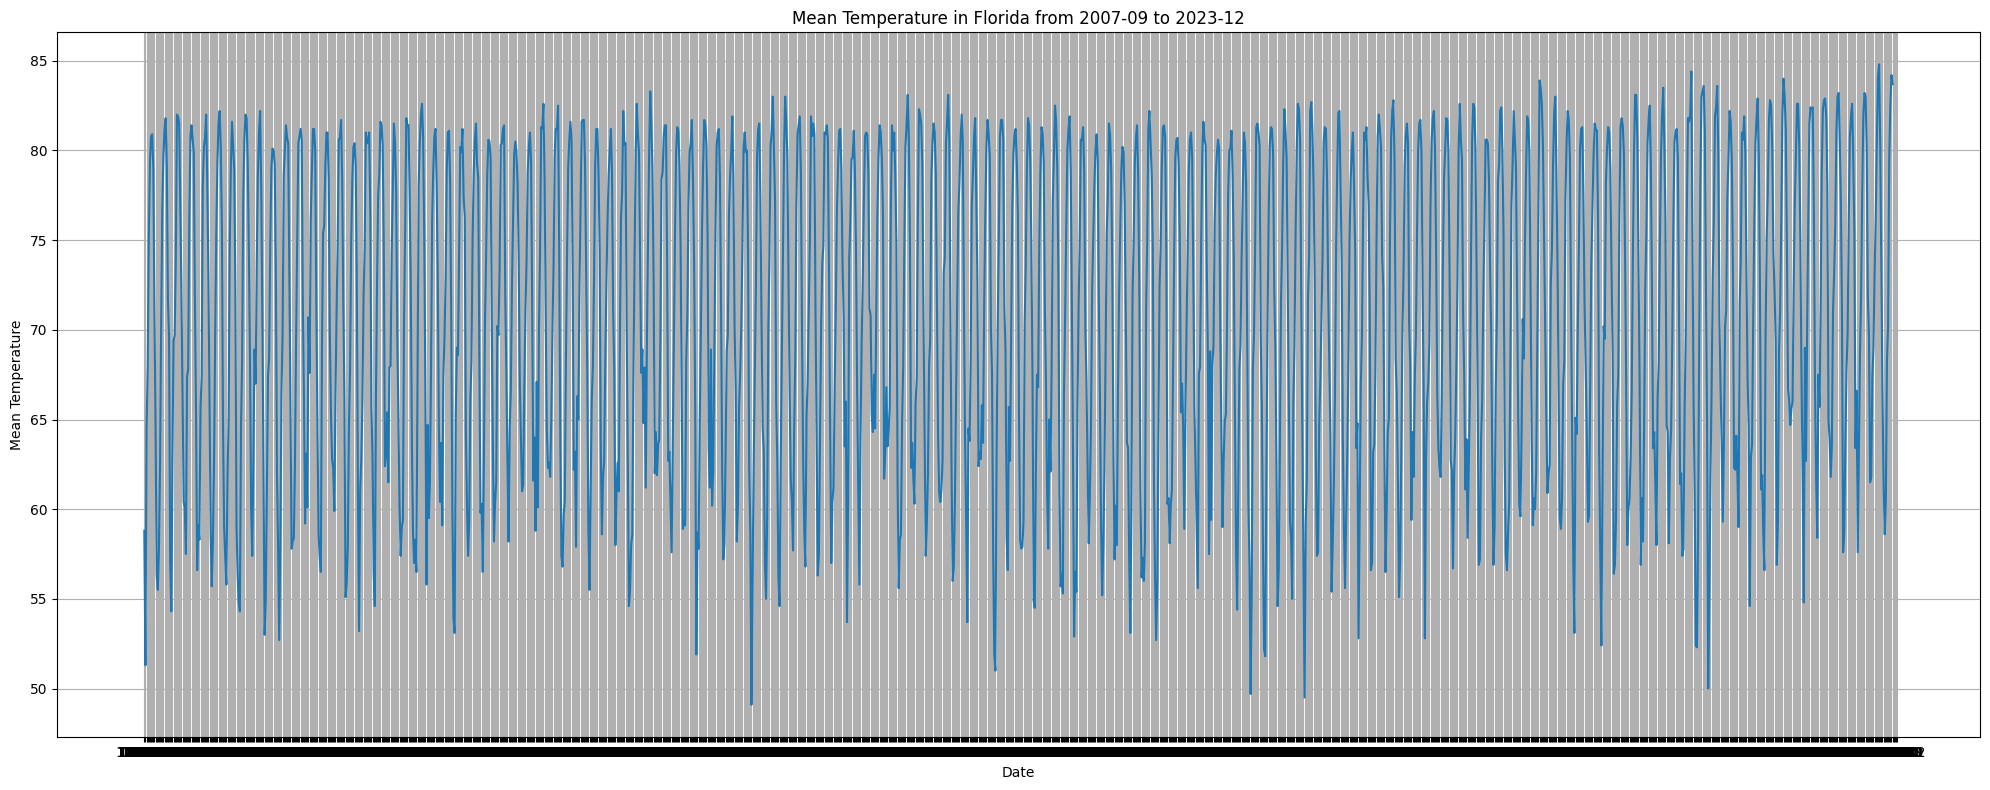

In [105]:
#plotting the data
plt.figure(figsize=(20, 8))
plt.plot(melted_df['Date'], melted_df['Temperature'])
plt.title('Mean Temperature in Florida from 2007-09 to 2023-12')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid()
plt.tight_layout()
plt.show()

In [106]:
# filter the date from 2007-9 to 2023-12
melted_df = melted_df[(melted_df['Date'] >= '2007-09') & (melted_df['Date'] <= '2023-12')]
melted_df.head()


,Date,Temperature
1352,2007-09,80.3
1353,2007-10,76.1
1354,2007-11,64.7
1355,2007-12,64.3
1356,2008-01,58.1


In [107]:
# save the filtered data to a new csv file
melted_df.to_csv('fl_historical_temperatures_data_2007-2023.csv', index=False)

In [134]:
df_rainfall = pd.read_html(StringIO(html_data_rainfall))[0]


In [135]:
df_rainfall.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1,1895,4.06,3.77,2.66,4.84,4.96,5.97,7.42,7.27,3.95,2.70,2.74,1.65,51.99
2,1896,3.48,3.63,2.70,0.85,2.39,10.93,7.27,5.26,4.21,3.33,3.89,2.40,50.34
3,1897,1.57,6.59,3.25,4.25,1.57,5.66,8.56,7.94,9.24,3.94,1.46,2.97,57.00
4,1898,0.95,1.68,1.07,1.91,1.43,4.00,9.57,13.49,6.08,6.49,3.22,3.80,53.69


In [136]:
#Set the first row as the header
df_rainfall.columns = df_rainfall.iloc[0]
df_rainfall = df_rainfall[1:]
df_rainfall.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1,1895,4.06,3.77,2.66,4.84,4.96,5.97,7.42,7.27,3.95,2.70,2.74,1.65,51.99
2,1896,3.48,3.63,2.70,0.85,2.39,10.93,7.27,5.26,4.21,3.33,3.89,2.40,50.34
3,1897,1.57,6.59,3.25,4.25,1.57,5.66,8.56,7.94,9.24,3.94,1.46,2.97,57.00
4,1898,0.95,1.68,1.07,1.91,1.43,4.00,9.57,13.49,6.08,6.49,3.22,3.80,53.69
5,1899,4.84,6.03,1.99,3.78,1.25,6.61,7.34,6.62,5.15,5.05,0.80,2.05,51.51


In [137]:
df_rainfall.drop('Annual', axis=1, inplace=True)

# Reshaping the DataFrame to have one row per month-year

melted_df = df_rainfall.melt(id_vars='Year', var_name='Month', value_name='Precipitation')
melted_df['Date'] = pd.to_datetime(melted_df['Year'].astype(str) + '-' + melted_df['Month'])

# Adjusting date format to 'YYYY-MM'
melted_df['Date'] = melted_df['Date'].dt.strftime('%Y-%m')

# Dropping extra columns
melted_df.drop(['Year', 'Month'], axis=1, inplace=True)

# Sorting by Date
melted_df.sort_values(by='Date', inplace=True)

# Resetting the index
melted_df.reset_index(drop=True, inplace=True)

melted_df.head()

C:\Users\xiaming\AppData\Local\Temp\ipykernel_36524\1036354392.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df['Date'] = pd.to_datetime(melted_df['Year'].astype(str) + '-' + melted_df['Month'])


,Precipitation,Date
0,4.06,1895-01
1,3.77,1895-02
2,2.66,1895-03
3,4.84,1895-04
4,4.96,1895-05


In [138]:
# change 'Date' to first column 
melted_df = melted_df[['Date', 'Precipitation']]
melted_df['Date'] = pd.to_datetime(melted_df['Date'])
melted_df['Precipitation'] = melted_df['Precipitation'].astype(float)

melted_df.head()

,Date,Precipitation
0,1895-01-01,4.06
1,1895-02-01,3.77
2,1895-03-01,2.66
3,1895-04-01,4.84
4,1895-05-01,4.96


In [139]:
melted_df.to_csv('fl_historical_precipitations_data.csv', index=False)

In [140]:
#filter the data from 2007-9 to 2023-12 

melted_df = melted_df[(melted_df['Date'] >= '2007-09') & (melted_df['Date'] <= '2023-12')]
melted_df.head()


,Date,Precipitation
1352,2007-09-01,6.69
1353,2007-10-01,5.75
1354,2007-11-01,1.37
1355,2007-12-01,2.37
1356,2008-01-01,2.95


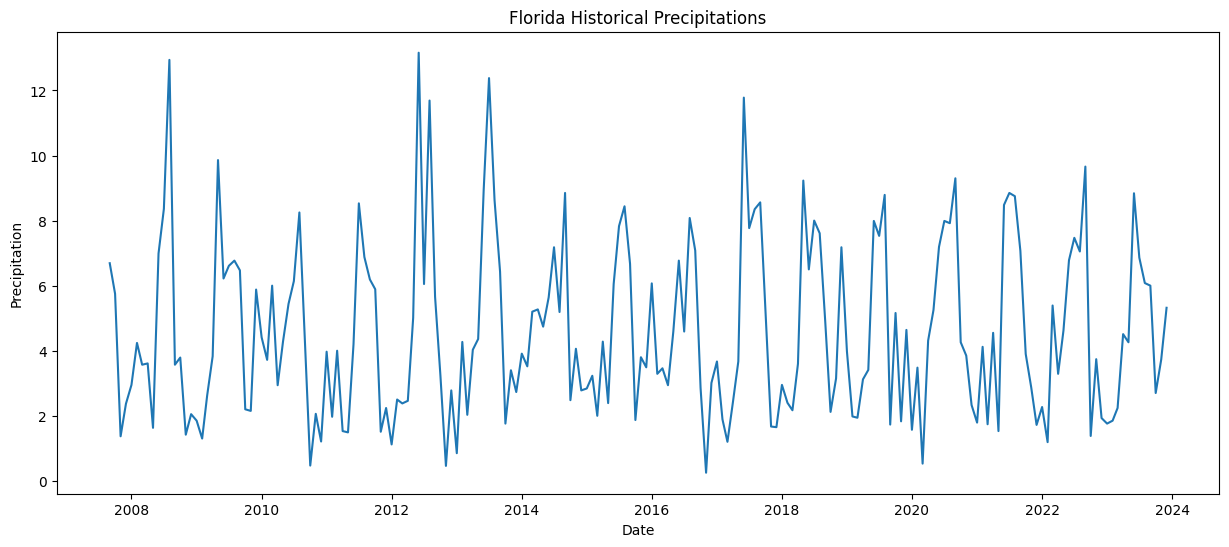

In [141]:
#plot the data
plt.figure(figsize=(15, 6))
plt.plot(melted_df['Date'], melted_df['Precipitation'])
plt.title('Florida Historical Precipitations')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()


In [97]:
# Save the data to a CSV file
melted_df.to_csv('fl_historical_precipitations_data2007-2023.csv', index=False)

In [3]:
# read the data from the csv file

wind_path = "data\windspeed"

wind_data = pd.DataFrame()
for file in os.listdir(wind_path):
    if file.endswith('.csv'):
        wind_data_df = pd.read_csv(os.path.join(wind_path, file))
        wind_data_df = wind_data_df[['datetime', 'windspeed']]
        wind_data_df['datetime'] = pd.to_datetime(wind_data_df['datetime'])
        wind_data_df['windspeed'] = wind_data_df['windspeed'].astype(float)
        wind_data = pd.concat([wind_data, wind_data_df])

In [4]:
wind_data.head()

,datetime,windspeed
0,2008-01-01,19.6
1,2008-01-02,21.8
2,2008-01-03,9.1
3,2008-01-04,6.9
4,2008-01-05,11.3


In [5]:
wind_data.tail()

,datetime,windspeed
360,2023-12-27,8.0
361,2023-12-28,15.0
362,2023-12-29,16.0
363,2023-12-30,16.8
364,2023-12-31,8.1


In [6]:
len(wind_data)

5844

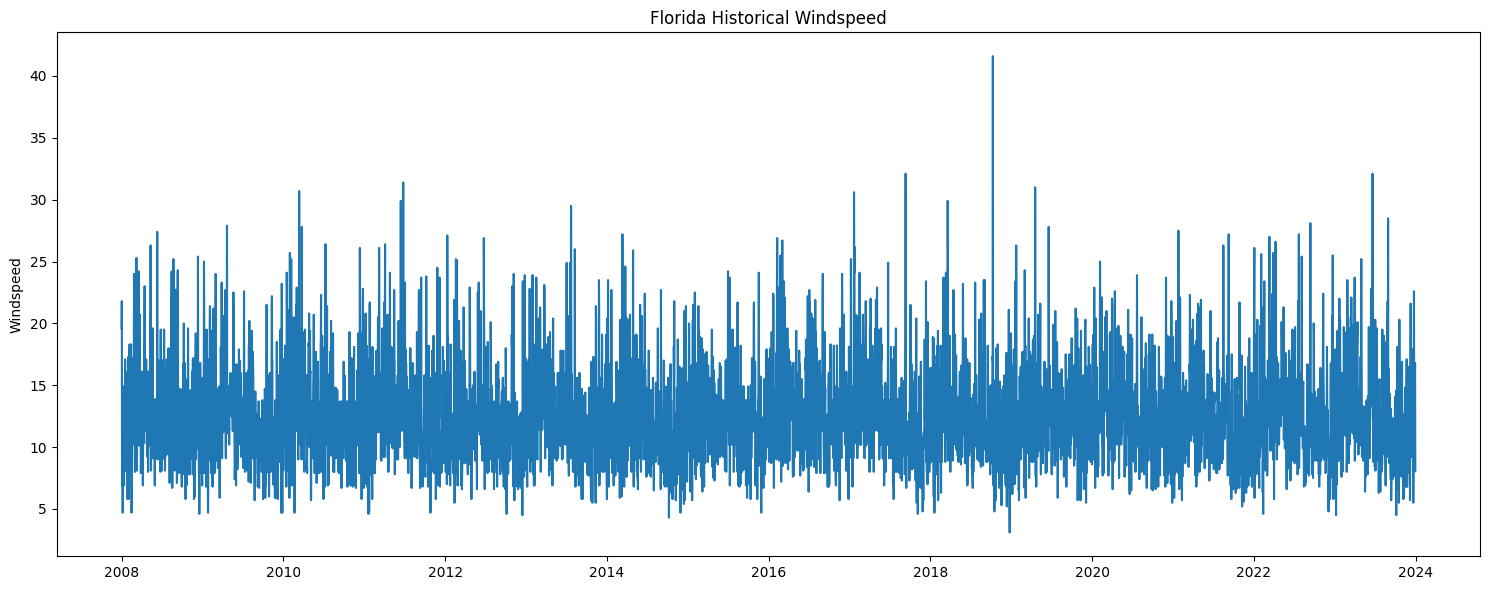

In [7]:
import matplotlib.dates as mdates

# set the x-axis to be the date only year with no month
plt.figure(figsize=(15, 6))
plt.plot(wind_data['datetime'], wind_data['windspeed'])
plt.title('Florida Historical Windspeed')
plt.ylabel('Windspeed')

plt.tight_layout()
plt.show()


In [147]:
wind_data.to_csv('fl_historical_windspeed_data.csv', index=False)

In [151]:
# merge data
temp1 = pd.read_csv('data/DataAfter2008/fl_historical_climate_data_2007-2023.csv')
temp2 = pd.read_csv('data/DataAfter2008/fl_historical_precipitations_data2007-2023.csv')
temp3 = pd.read_csv('data/DataAfter2008/fl_historical_windspeed_data2008-2023.csv')

# add new columns 'Date' to store the average month wind speed
temp3['datetime'] = pd.to_datetime(temp3['datetime'])
temp3.set_index('datetime', inplace=True)

# Group by month and year to calculate average windspeed
monthly_windspeed = temp3.resample('M').mean()

# Reset index to make 'datetime' a column again
monthly_windspeed.reset_index(inplace=True)

# Create a new DataFrame with the necessary columns
result_frame = monthly_windspeed.rename(columns={'windspeed': 'AvgWindSpeed'})
result_frame['Date'] = result_frame['datetime'].dt.strftime('%Y-%m')

# Drop the 'datetime' column and set 'Date' as the index
result_frame.drop('datetime', axis=1, inplace=True)
result_frame.set_index('Date', inplace=True)


In [152]:
weather_data = pd.merge(temp1, temp2, on='Date', how='outer')

weather_data = pd.merge(weather_data, result_frame, on='Date', how='outer')
weather_data.head()

,Date,Temperature,Precipitation,AvgWindSpeed
0,2007-09,80.3,6.69,NaN
1,2007-10,76.1,5.75,NaN
2,2007-11,64.7,1.37,NaN
3,2007-12,64.3,2.37,NaN
4,2008-01,58.1,2.95,12.293548


In [153]:
deliquent_data = pd.read_csv('data/DataAfter2008/deliquency_data.csv')

deliquent_data = deliquent_data[['Date', 'FL_30-89 days', 'FL_90+ days']]

# filter the data from 2008-1 to 2023-12
deliquent_data['Date'] = pd.to_datetime(deliquent_data['Date'])
deliquent_data = deliquent_data[(deliquent_data['Date'] >= '2008-01') & (deliquent_data['Date'] <= '2023-12')]

deliquent_data.head()

,Date,FL_30-89 days,FL_90+ days
96,2008-01-01,4.4,2.5
97,2008-02-01,4.0,2.6
98,2008-03-01,4.1,2.7
99,2008-04-01,4.0,2.8
100,2008-05-01,4.2,2.9


In [154]:
len(deliquent_data), len(weather_data)

(192, 196)

In [155]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Merge the data
final_data = pd.merge(weather_data, deliquent_data, on='Date', how='outer')

final_data.head()

,Date,Temperature,Precipitation,AvgWindSpeed,FL_30-89 days,FL_90+ days
0,2007-09-01,80.3,6.69,NaN,NaN,NaN
1,2007-10-01,76.1,5.75,NaN,NaN,NaN
2,2007-11-01,64.7,1.37,NaN,NaN,NaN
3,2007-12-01,64.3,2.37,NaN,NaN,NaN
4,2008-01-01,58.1,2.95,12.293548,4.4,2.5


In [156]:
len(final_data)

196

In [157]:
co2_data = pd.read_csv('data/DataAfter2008/co2_data_filtered.csv')
co2_data['Date'] = pd.to_datetime(co2_data['Date'])

# only keep Date Month_Average column
co2_data = co2_data[['Date', 'Month_Average']]

# Merge the data
final_data = pd.merge(final_data, co2_data, on='Date', how='outer')

# reset the column order
final_data = final_data.rename(columns={'AvgWindSpeed': 'AvgMonthWindSpeed', 
                                        'Month_Average': 'CO2MonthAvgEmission',
                                        'Precipitation': 'AvgMonthPrecipitation', 
                                        'Temperature': 'AvgMonthTemp'})
final_data.head()

,Date,AvgMonthTemp,AvgMonthPrecipitation,AvgMonthWindSpeed,FL_30-89 days,FL_90+ days,CO2MonthAvgEmission
0,2007-09-01,80.3,6.69,NaN,NaN,NaN,2007.7083
1,2007-10-01,76.1,5.75,NaN,NaN,NaN,2007.7917
2,2007-11-01,64.7,1.37,NaN,NaN,NaN,2007.8750
3,2007-12-01,64.3,2.37,NaN,NaN,NaN,2007.9583
4,2008-01-01,58.1,2.95,12.293548,4.4,2.5,2008.0417


In [158]:
# reorder the columns
final_data = final_data[['Date', 'AvgMonthTemp', 'AvgMonthPrecipitation', 'AvgMonthWindSpeed', 'CO2MonthAvgEmission', 'FL_30-89 days', 'FL_90+ days']]

final_data.head()

,Date,AvgMonthTemp,AvgMonthPrecipitation,AvgMonthWindSpeed,CO2MonthAvgEmission,FL_30-89 days,FL_90+ days
0,2007-09-01,80.3,6.69,NaN,2007.7083,NaN,NaN
1,2007-10-01,76.1,5.75,NaN,2007.7917,NaN,NaN
2,2007-11-01,64.7,1.37,NaN,2007.8750,NaN,NaN
3,2007-12-01,64.3,2.37,NaN,2007.9583,NaN,NaN
4,2008-01-01,58.1,2.95,12.293548,2008.0417,4.4,2.5


In [159]:
len(final_data)

196

In [160]:
cyclone_data = pd.read_csv('data/DataAfter2008/florida_cyclones.csv')

cyclone_data_cleaned = cyclone_data[['Date', 'Cyclone Name']].drop_duplicates()

cyclone_data_cleaned['Date'] = pd.to_datetime(cyclone_data_cleaned['Date'])

# set all the Date to the first day of the month
cyclone_data_cleaned['Date'] = cyclone_data_cleaned['Date'] + pd.offsets.MonthBegin(-1)

cyclone_data_cleaned.head()


,Date,Cyclone Name
0,2007-06-01,BARRY
4,2007-09-01,TEN
6,2007-09-01,TEN
7,2007-12-01,OLGA
9,2008-08-01,EDOUARD


In [161]:
# Merge the data
final_data = pd.merge(final_data, cyclone_data_cleaned, on='Date', how='outer')

In [162]:
final_data = final_data[['Date', 'AvgMonthTemp', 'AvgMonthPrecipitation', 'AvgMonthWindSpeed', 'CO2MonthAvgEmission', 'Cyclone Name','FL_30-89 days', 'FL_90+ days']]

final_data.head()

,Date,AvgMonthTemp,AvgMonthPrecipitation,AvgMonthWindSpeed,CO2MonthAvgEmission,Cyclone Name,FL_30-89 days,FL_90+ days
0,2007-09-01,80.3,6.69,NaN,2007.7083,TEN,NaN,NaN
1,2007-09-01,80.3,6.69,NaN,2007.7083,TEN,NaN,NaN
2,2007-10-01,76.1,5.75,NaN,2007.7917,NaN,NaN,NaN
3,2007-11-01,64.7,1.37,NaN,2007.8750,NaN,NaN,NaN
4,2007-12-01,64.3,2.37,NaN,2007.9583,OLGA,NaN,NaN


In [163]:
# filter the duplicated data
final_data = final_data.drop_duplicates()


In [164]:
events_data_cleaned = pd.read_csv('data/events-FL-1980-2024.csv', skiprows=2)


# Keep only the necessary columns: 'Name', 'Disaster', 'Begin Date'
events_data_cleaned = events_data_cleaned[['Name', 'Disaster', 'Begin Date']]

# filter the data from 2008-1 to 2023-12
events_data_cleaned['Begin Date'] = pd.to_datetime(events_data_cleaned['Begin Date'], format='%Y%m%d')
events_data_cleaned = events_data_cleaned[(events_data_cleaned['Begin Date'] >= '2008-01') & (events_data_cleaned['Begin Date'] <= '2023-12')]

events_data_cleaned.rename(columns={'Name': 'DisasterName', 'Begin Date': 'Date', 'Disaster': 'DisasterType'}, inplace=True)

# reorder the columns
events_data_cleaned = events_data_cleaned[['Date', 'DisasterName', 'DisasterType']]

events_data_cleaned.head()

,Date,DisasterName,DisasterType
42,2008-09-01,U.S. Wildfires (Fall 2008),Wildfire
43,2011-03-01,Southern Plains/Southwest Drought and Heat Wav...,Drought
44,2011-06-01,"Texas, New Mexico, Arizona Wildfires (Summer-F...",Wildfire
45,2012-08-26,Hurricane Isaac (August 2012),Tropical Cyclone
46,2014-04-27,Midwest/Southeast/Northeast Tornadoes and Floo...,Severe Storm


In [165]:
# set all the Date to the first day of the month
events_data_cleaned['Date'] = events_data_cleaned['Date'] + pd.offsets.MonthBegin(-1)

events_data_cleaned.head()

len(events_data_cleaned), len(final_data)

(40, 205)

In [166]:
final_data.head()

,Date,AvgMonthTemp,AvgMonthPrecipitation,AvgMonthWindSpeed,CO2MonthAvgEmission,Cyclone Name,FL_30-89 days,FL_90+ days
0,2007-09-01,80.3,6.69,NaN,2007.7083,TEN,NaN,NaN
2,2007-10-01,76.1,5.75,NaN,2007.7917,NaN,NaN,NaN
3,2007-11-01,64.7,1.37,NaN,2007.8750,NaN,NaN,NaN
4,2007-12-01,64.3,2.37,NaN,2007.9583,OLGA,NaN,NaN
5,2008-01-01,58.1,2.95,12.293548,2008.0417,NaN,4.4,2.5


In [167]:
final_data = pd.merge(final_data, events_data_cleaned, on='Date', how='outer')

final_data.head()

,Date,AvgMonthTemp,AvgMonthPrecipitation,AvgMonthWindSpeed,CO2MonthAvgEmission,Cyclone Name,FL_30-89 days,FL_90+ days,DisasterName,DisasterType
0,2007-09-01,80.3,6.69,NaN,2007.7083,TEN,NaN,NaN,NaN,NaN
1,2007-10-01,76.1,5.75,NaN,2007.7917,NaN,NaN,NaN,NaN,NaN
2,2007-11-01,64.7,1.37,NaN,2007.8750,NaN,NaN,NaN,NaN,NaN
3,2007-12-01,64.3,2.37,NaN,2007.9583,OLGA,NaN,NaN,NaN,NaN
4,2008-01-01,58.1,2.95,12.293548,2008.0417,NaN,4.4,2.5,NaN,NaN


In [168]:
final_data['DisasterName'] = final_data['Cyclone Name'].combine_first(final_data['DisasterName'])
final_data.drop(columns=['Cyclone Name'], inplace=True)

final_data.head()

,Date,AvgMonthTemp,AvgMonthPrecipitation,AvgMonthWindSpeed,CO2MonthAvgEmission,FL_30-89 days,FL_90+ days,DisasterName,DisasterType
0,2007-09-01,80.3,6.69,NaN,2007.7083,NaN,NaN,TEN,NaN
1,2007-10-01,76.1,5.75,NaN,2007.7917,NaN,NaN,NaN,NaN
2,2007-11-01,64.7,1.37,NaN,2007.8750,NaN,NaN,NaN,NaN
3,2007-12-01,64.3,2.37,NaN,2007.9583,NaN,NaN,OLGA,NaN
4,2008-01-01,58.1,2.95,12.293548,2008.0417,4.4,2.5,NaN,NaN


In [169]:
final_data = final_data[['Date', 'AvgMonthTemp', 'AvgMonthPrecipitation', 'AvgMonthWindSpeed', 'CO2MonthAvgEmission','DisasterName', 'DisasterType', 'FL_30-89 days', 'FL_90+ days']]

final_data.head()   

,Date,AvgMonthTemp,AvgMonthPrecipitation,AvgMonthWindSpeed,CO2MonthAvgEmission,DisasterName,DisasterType,FL_30-89 days,FL_90+ days
0,2007-09-01,80.3,6.69,NaN,2007.7083,TEN,NaN,NaN,NaN
1,2007-10-01,76.1,5.75,NaN,2007.7917,NaN,NaN,NaN,NaN
2,2007-11-01,64.7,1.37,NaN,2007.8750,NaN,NaN,NaN,NaN
3,2007-12-01,64.3,2.37,NaN,2007.9583,OLGA,NaN,NaN,NaN
4,2008-01-01,58.1,2.95,12.293548,2008.0417,NaN,NaN,4.4,2.5


In [170]:
len(final_data)

# remove the 2007-06-01 row 
final_data = final_data[final_data['Date'] != '2007-06-01']

In [171]:
#convert the data to csv file
final_data.to_csv('weatheranddeliquency_data.csv', index=False)

In [11]:
# read the data from the csv file

X = pd.read_csv('data/2008-2023macroeconomicData.csv')

X = X[['Date', 'FL_Unemployment_Rate']].dropna()

X.head(10)    


,Date,FL_Unemployment_Rate
0,2008-01-01,4.2
23,2008-02-01,4.4
44,2008-03-01,4.6
66,2008-04-01,4.9
88,2008-05-01,5.2
110,2008-06-01,5.5
132,2008-07-01,5.8
155,2008-08-01,6.1
176,2008-09-01,6.4
198,2008-10-01,6.7


In [4]:
us_disaster_df = pd.read_csv('data/natural-disasters.csv')

us_disaster_df.head()

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,...,total_damages_pct_gdp_glacial_lake_outburst_flood,total_damages_pct_gdp_wet_mass_movement,deaths_all_disasters_excluding_earthquakes,deaths_all_disasters_excluding_extreme_temperature,deaths_glacial_lake_outburst_flood,deaths_wet_mass_movement,deaths_rate_per_100k_all_disasters_excluding_earthquakes,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature,deaths_rate_per_100k_glacial_lake_outburst_flood,deaths_rate_per_100k_wet_mass_movement
0,Afghanistan,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,25.431416,NaN,NaN
1,Afghanistan,1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.0,151.0,NaN,NaN,0.630585,1.867026,NaN,NaN
2,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,107.0,107.0,NaN,NaN,1.168446,1.168446,NaN,NaN
3,Afghanistan,1969,0.0,0.0,48000.0,0.0,48000.0,0.0,0.0,200000.0,...,NaN,NaN,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN,NaN
4,Afghanistan,1971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,100.0,100.0,NaN,100.0,0.907783,0.907783,NaN,0.907783


In [5]:
# select only the data for united states
us_disaster_df = us_disaster_df[us_disaster_df['Country name'] == 'United States']
us_disaster_df.head()

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,...,total_damages_pct_gdp_glacial_lake_outburst_flood,total_damages_pct_gdp_wet_mass_movement,deaths_all_disasters_excluding_earthquakes,deaths_all_disasters_excluding_extreme_temperature,deaths_glacial_lake_outburst_flood,deaths_wet_mass_movement,deaths_rate_per_100k_all_disasters_excluding_earthquakes,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature,deaths_rate_per_100k_glacial_lake_outburst_flood,deaths_rate_per_100k_wet_mass_movement
6875,United States,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6000.0,6000.0,NaN,NaN,8.018185,8.018185,NaN,NaN
6876,United States,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,348.0,348.0,NaN,NaN,0.439461,0.439461,NaN,NaN
6877,United States,1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,298.0,998.0,NaN,NaN,0.355481,1.190505,NaN,NaN
6878,United States,1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,463.0,463.0,NaN,NaN,0.522294,0.522294,NaN,NaN
6879,United States,1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,30.0,NaN,NaN,0.033277,0.033277,NaN,NaN


In [6]:
#save the data to csv file
us_disaster_df.to_csv('us_disaster_data.csv', index=False)
